Decision Tree

In [11]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# training
from sklearn.tree import DecisionTreeClassifier 

%matplotlib inline

Loading datasets

In [3]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")

In [4]:
print(f"Training dataset shape: {X_train.shape}")
print(f"Testing dataset shape: {X_test.shape}")

print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

Training dataset shape: (370515, 31)
Testing dataset shape: (123505, 31)
Training labels: (370515, 1)
Testing labels: (123505, 1)


In [5]:
y_train = y_train['label']
y_test = y_test['label']

In [6]:
print(y_train.unique())
     

['normal' 'dos' 'r2l' 'probe' 'u2r']


In [13]:
# training
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:

print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")

Training score: 0.9999973010539385
Testing score: 0.9996842233107971


In [15]:
y_predicted = model.predict(X_test)

Model Evaluation

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       0.99      0.99      0.99      1056
         r2l       0.97      0.96      0.97       279
         u2r       0.62      0.67      0.64        12

    accuracy                           1.00    123505
   macro avg       0.92      0.92      0.92    123505
weighted avg       1.00      1.00      1.00    123505



In [17]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

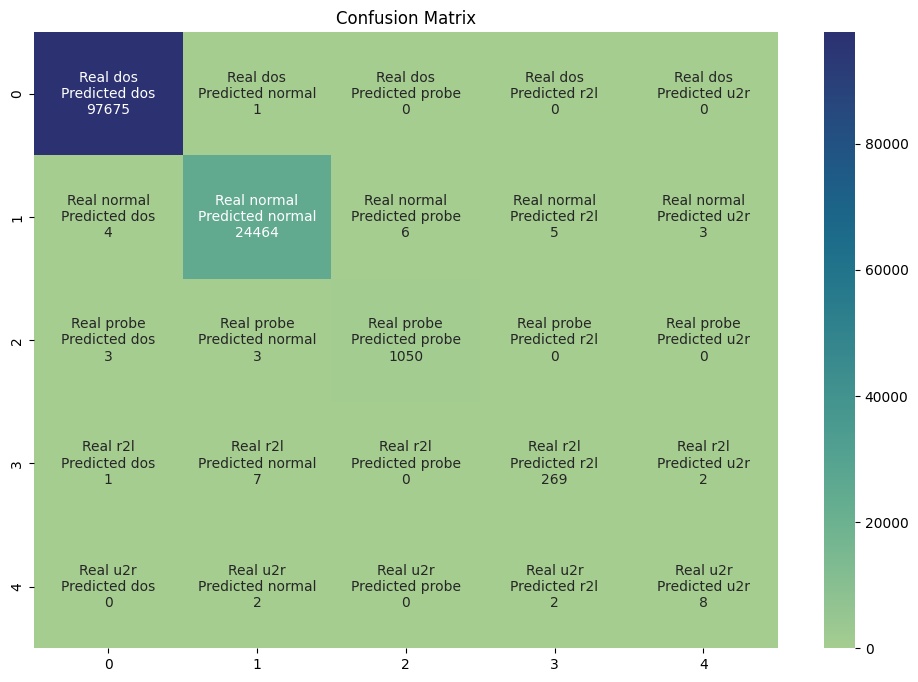

In [18]:
# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()
     

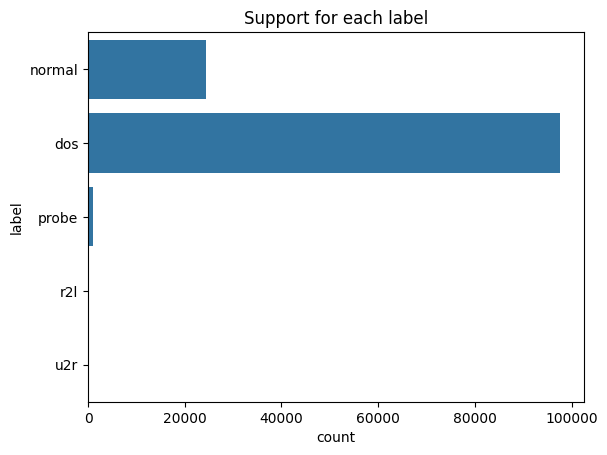


label
dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: count, dtype: float64

label
dos       97676
normal    24482
probe      1056
r2l         279
u2r          12
Name: count, dtype: int64


In [19]:
plt.figure()
plt.title("Support for each label")
sns.countplot(y_test)
plt.show()

print(f"\n{y_test.value_counts() / y_test.shape[0]}\n\n{y_test.value_counts()}")